In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
url = "dataOverfitting.csv"
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0, 0.5, 'Frequency')

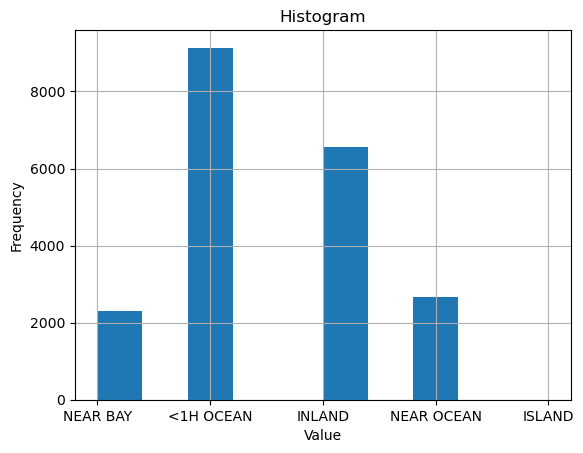

In [46]:
df['ocean_proximity'].hist(bins=10)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [47]:
# Xóa các bản ghi bị thiếu dữ liệu
df.dropna(inplace=True)
# Chuyển đổi các thuộc tính dạng chuỗi thành dạng số
names = df.columns.values.tolist()
le = LabelEncoder()
for i in names:
  if df[i].dtypes == object:
    df[i] = le.fit_transform(df[i])

In [48]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [49]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
scaler = MinMaxScaler()

X = scaler.fit_transform(df.iloc[:, :-1].values)
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train[0], y_train[0])

[0.48207171 0.19766206 0.45098039 0.08698306 0.09233395 0.04932874
 0.09866798 0.32440932 0.59030891] 4


### KNeighbors Classifier Huấn luyện mô hình KNN với n_neighbors=4 

In [50]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.8825371965544244
Test accuracy: 0.8296956053636096


### K-fold cross-validation để đánh giá mô hình

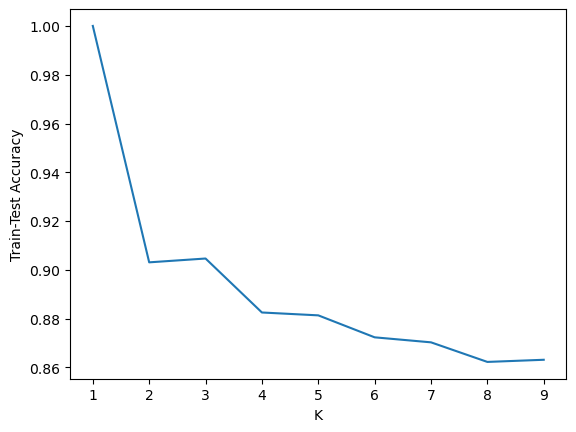

In [51]:
k_range = range(1, 10)
acc_train = []
acc_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_train.append(knn.score(X_train, y_train))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, acc_train)
plt.xlabel('K')
plt.ylabel('Train-Test Accuracy')
plt.show()

### KNeighbors Classifier Huấn luyện mô hình KNN với n_neighbors=3

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9046593578700078
Test accuracy: 0.8331212684741117


### Cross-validation để đánh giá mô hình

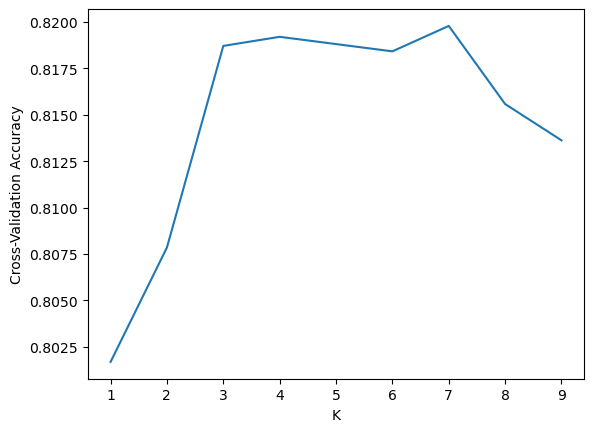

In [53]:
k_range = range(1, 10)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

### Theo biểu đồ trên ta thấy K = 7 thì cross-validation cao nhất

In [54]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.870301487862177
Test accuracy: 0.8330233923852403


### Create a regularized decision tree classifier

In [55]:
reg_tree = DecisionTreeClassifier(random_state=42, max_depth=3)

# Fit the regularized decision tree on the training data
reg_tree.fit(X_train, y_train)

# Predict the classes of the training and test data
train_preds = reg_tree.predict(X_train)
test_preds = reg_tree.predict(X_test)

# Compute the training and test accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Training accuracy: 0.772
Test accuracy: 0.767


### Áp dụng k-fold cross-validation để đánh giá mô hình

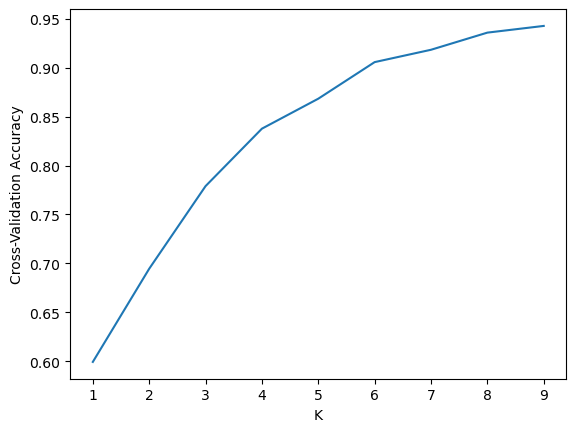

In [56]:
max_depth = range(1, 10)
cv_scores = []
for k in max_depth:
    reg_tree = DecisionTreeClassifier(random_state=42, max_depth=k)

    scores = cross_val_score(reg_tree, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(max_depth, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

### Regularization(min_samples_leaf) giảm độ sâu của cây quyết định và tránh overfitting.

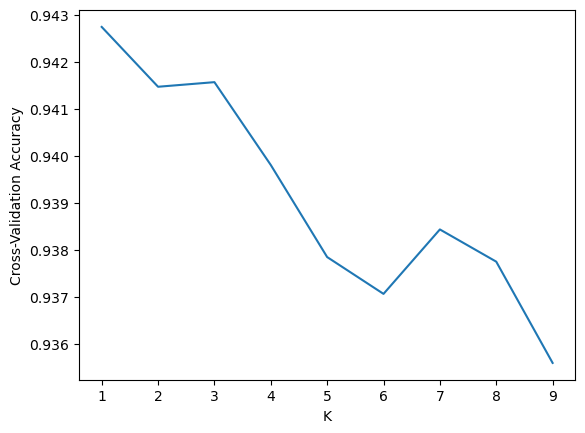

In [57]:
min_samples_leaf = range(1, 10)
max_depth = range(1, 10)

cv_scores = []
for k in min_samples_leaf:
    reg_tree = DecisionTreeClassifier(random_state=42, max_depth=9, min_samples_leaf=k)

    scores = cross_val_score(reg_tree, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(min_samples_leaf, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [58]:
reg_tree = DecisionTreeClassifier(random_state=42, max_depth=9, min_samples_leaf=7)
# Fit the regularized decision tree on the training data
reg_tree.fit(X_train, y_train)

# Predict the classes of the training and test data
train_preds = reg_tree.predict(X_train)
test_preds = reg_tree.predict(X_test)

# Compute the training and test accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Training accuracy: 0.961
Test accuracy: 0.945


### Tính confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = reg_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')

print('Recall:', recall)
print('Precision:', precision)
print('F1-score:', f1)

Confusion matrix:
 [[4450   39    0    8   48]
 [ 155 3042    0   13    7]
 [   0    0    0    0    3]
 [   4    3    0 1107   13]
 [ 214    2    0   48 1061]]
Recall: 0.9454830184985809
Precision: 0.9465011238754752
F1-score: 0.9445979981127068
